In [3]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [16]:
# Optional. Declutter output
import warnings
#with warnings.catch_warnings():
    #warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [104]:
# From Rylan Schaeffer's code

np.random.seed(0)

#num_data_list = [15]
'''
#num_features_list = [
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    30,
    40,
    50,
    100,
    200,
]
'''
#num_repeat_list = list(range(10))
scale_factor = 10
num_data_list=[15*scale_factor]
#num_features_list = np.arange(1, 1000, 10)#
#num_features_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,50,75]
#num_features_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,90,100,120,140,160,180,200,220,240,260,280,300,340,380,420,460,500,550,600]
#num_features_list = [x*scale_factor for x in num_features_list]
num_features_list = np.concatenate([np.arange(1, 30, 1), np.arange(30, 100, 2), np.arange(100, 200, 10), np.array([250, 400, 600, 750])])
# Note that the above num_features_list is bespoke to this specific scale factor of 10
num_repeat_list = list(range(2500))

 74%|███████▍  | 58/78 [15:19<05:17, 15.86s/it]


KeyboardInterrupt: 

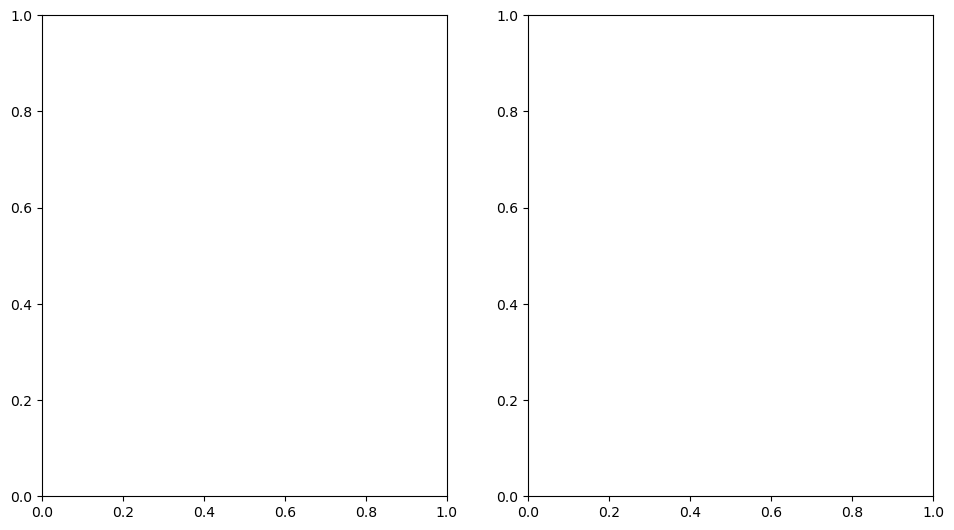

In [105]:
# Create sklearn linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
mse_dfs = []
low, high = -1.0, 1.0
for num_data in num_data_list:
    def compute_y_from_x(X: np.ndarray):
        return np.add(2.0 * X, np.cos(X * 25))[:, 0]
    
    mse_list = []
    # Generate test data.
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
    y_test = compute_y_from_x(X_test)
    fig, axs = plt.subplots(1, 2, figsize=(11.5, 6.25))  # Move this line inside the loop
    for num_features in tqdm(num_features_list):
        feature_degrees = 1 + np.arange(num_features).astype(int)
        for repeat_idx in num_repeat_list:
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )

    mse_df = pd.DataFrame(mse_list)
    mse_dfs.append(mse_df)
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Test MSE",
        label="Test",
        ax=axs[0],
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
        ax=axs[0],
    )
    ax = axs[0]
    ax.set_ylabel("Mean Squared Error")
    ax.set_xlabel("Parameter Number")
    ax.set_ylim(bottom=1e-3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title(f"Cosine with Linear Term")
    ax.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    ax.legend(loc='upper right')

    # Now computing the cosine plot

    def compute_y_from_x_cos(X: np.ndarray):  # Redefining this code
        return np.cos(X * 25)

    # Create sklearn linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)

    mse_list = []
    # Generate test data.
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
    y_test = compute_y_from_x_cos(X_test)
    for num_features in tqdm(num_features_list):
        feature_degrees = 1 + np.arange(num_features).astype(int)
        for repeat_idx in num_repeat_list:
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )

    mse_df = pd.DataFrame(mse_list)
    mse_dfs.append(mse_df)
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
       y="Test MSE",
        label="Test",
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
    )
    ax = axs[1]
    ax.set_ylim(bottom=1e-3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title(f"Cosine Only")
    ax.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

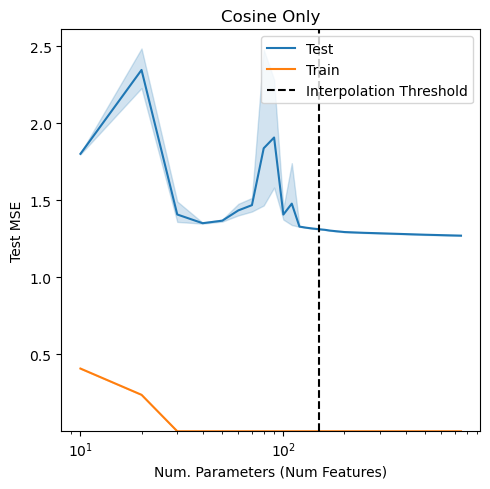

In [85]:
scale_factor = 10
num_data = 15*scale_factor
mse_df = pd.DataFrame(mse_list)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
   y="Test MSE",
    label="Test",
)
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
    y="Train MSE",
    label="Train",
)
#ax = axs[0]
ax.set_ylim(bottom=1e-3)
#ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title(f"Cosine Only")
ax.axvline(
    x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [87]:
num_features_list = np.concatenate([np.arange(1, 10, 1), np.arange(10, 100, 2), np.arange(100, 200, 10), np.array([250, 400, 600, 750])])

print(num_features_list)

[  1   2   3   4   5   6   7   8   9  10  12  14  16  18  20  22  24  26
  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62
  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98
 100 110 120 130 140 150 160 170 180 190 250 400 600 750]
